In [1]:
%tensorflow_version 
%tensorflow_version 2.x

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x
TensorFlow 2.x selected.


In [0]:
%matplotlib inline


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
##從tensorflow keras datasets中抓出fashion mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
##讀取資料
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(
    "train images length :",len(train_images),
    "\ntrain labels length :",len(train_labels),
    "\ntest images length  :",len(test_images),
    "\ntest labels length  :",len(test_labels))

train images length : 60000 
train labels length : 60000 
test images length  : 10000 
test labels length  : 10000


train images max value  : 255 
train value max label : 9 
shape : (60000, 28, 28)


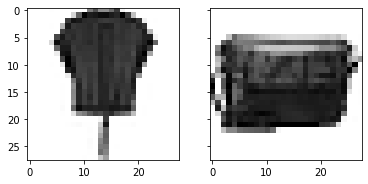

In [5]:
##definite a funciton to see  pictures

def graph_show_and_find_the_max_value(n):
    f,(ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.imshow(train_images[n],cmap='Greys')
    ax2.imshow(test_images[n],cmap ='Greys')
    max_value_images=np.amax(train_images)
    max_value_labels=max(train_labels)
    shape = train_images.shape
    print("train images max value  :" , max_value_images,
          "\ntrain value max label :",max_value_labels,
          "\nshape :" , shape)



##check function can work 
graph_show_and_find_the_max_value(56)


In [0]:
##reshape datasets 
def reshape_data(dataset1,dataset2,dataset3):
    shape =dataset1.shape
    max_value_images=np.amax(dataset1)
    x_train=dataset1.reshape(shape[0],shape[1]*shape[2])/max_value_images
    shape2 =dataset2.shape
    max_value_images2=np.amax(dataset2)
    validation_train=dataset2.reshape(shape2[0],shape2[1]*shape2[2])/max_value_images2
    shape3 =dataset3.shape
    max_value_images3=np.amax(dataset3)
    test_train=dataset3.reshape(shape3[0],shape2[1]*shape3[2])/max_value_images3
    return x_train,validation_train,test_train

In [0]:
##Splite validation and train datasets 
x_training = train_images[0:50000,:]
x_validation = train_images[50001:60000,:]

y_training = train_labels[0:50000,]
y_validation =  train_labels[50001:60000,]

In [0]:
x_train,x_val,x_test=reshape_data(x_training,x_validation,test_images)

In [0]:
#def categorical(dataset1,dataset2):
  #category1 = len(np.unique(dataset1))
  #category2 = len(np.unique(dataset2))
  #x_label = to_categorical(dataset1,category1)
  #val_label = to_categorical(dataset2,category2)
  #return x_label , val_label

#train_label,val_label =categorical(y_training ,y_validation)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten



#######       Model 
#1.修改神經元數量
#2.修改batch_size數
#3.修改epochs數
#4.修改optimizer變成adam
#5.loss變成sparse_categorical_crossentropy
#6.kernel_initializer變成he_uniform

element = 150
input_dimension = 784
activation_function = "relu"
num_classes = 10
out_activation_function = "softmax"
batch_size = 200
epochs = 25
#, kernel_initializer='he_uniform'

def model_building():
    model = Sequential() 
    model.add(Dense(element,input_dim = input_dimension,activation =activation_function, kernel_initializer='he_uniform'))
    model.add(Dense(element,activation = activation_function))
    model.add(Dense(element,activation = activation_function))
    model.add(Dense(element,activation = activation_function, kernel_initializer='he_uniform'))
    model.add(Dense(num_classes,activation=out_activation_function))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
    return model


model = model_building()
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_93 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_94 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_95 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_96 (Dense)             (None, 10)                1510      
Total params: 187,210
Trainable params: 187,210
Non-trainable params: 0
_________________________________________________________________


In [77]:
independent_variable = x_train
dependent_variable = y_training

model_result= model.fit(independent_variable,dependent_variable,validation_data=(x_val,y_validation),batch_size= batch_size ,epochs=epochs)

Epoch 1/25
250/250 [==============================] - 1s 3ms/step - loss: 0.5735 - accuracy: 0.7995 - val_loss: 0.4370 - val_accuracy: 0.8465
Epoch 2/25
250/250 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8597 - val_loss: 0.3977 - val_accuracy: 0.8507
Epoch 3/25
250/250 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8693 - val_loss: 0.3776 - val_accuracy: 0.8621
Epoch 4/25
250/250 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8843 - val_loss: 0.3506 - val_accuracy: 0.8737
Epoch 5/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.8893 - val_loss: 0.3341 - val_accuracy: 0.8787
Epoch 6/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.8942 - val_loss: 0.3224 - val_accuracy: 0.8845
Epoch 7/25
250/250 [==============================] - 1s 3ms/step - loss: 0.2632 - accuracy: 0.9016 - val_loss: 0.3188 - val_accuracy: 0.8862
Epoch 

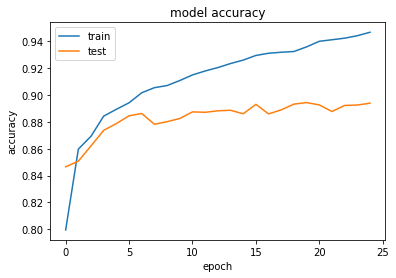

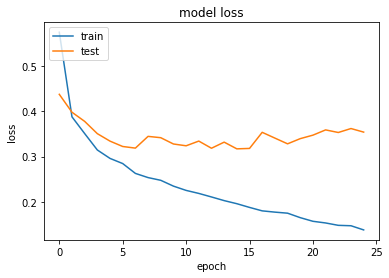

In [78]:
# summarize history for accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
##Model 1 prediction 

from sklearn import metrics
result = model.predict_classes(x_test)
print('\n\n the result \n\n Confusion Matrix\n\n',metrics.confusion_matrix(result, test_labels))
print("\n",metrics.classification_report(result, test_labels, digits=3))



 the result 

 Confusion Matrix

 [[874   3  18  28   2   0 143   0   5   0]
 [  1 975   0  10   0   0   1   0   0   0]
 [ 17   3 831  18  94   0  92   0   3   0]
 [ 17  10   9 864  24   0  21   0   5   0]
 [  3   3  79  45 814   0  57   0   1   0]
 [  4   0   0   1   1 976   0  24  13   8]
 [ 78   3  61  29  64   0 677   0   3   1]
 [  0   0   0   0   0  10   0 936   4  24]
 [  6   3   2   5   1   0   9   0 966   0]
 [  0   0   0   0   0  14   0  40   0 967]]

               precision    recall  f1-score   support

           0      0.874     0.815     0.843      1073
           1      0.975     0.988     0.981       987
           2      0.831     0.785     0.808      1058
           3      0.864     0.909     0.886       950
           4      0.814     0.812     0.813      1002
           5      0.976     0.950     0.963      1027
           6      0.677     0.739     0.707       916
           7      0.936     0.961     0.948       974
           8      0.966     0.974     0.970 